In [1]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.optimize as opt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from copy import deepcopy

In [2]:
json_files = [pos_json for pos_json in os.listdir("Logs") if pos_json.endswith('.json')]
data = []
for index, js in enumerate(json_files):
    with open(os.path.join('./Logs/', js)) as json_file:
        json_text = json.load(json_file)
        data.append(json_text)

In [3]:
names = []
for idx in range(len(data)):
    log = data[idx]
    names.append(log["user"]["nickname"])
    
new_order = [names.index(name) for name in sorted(names)]

new_data = []
for idx in new_order:
    new_data.append(data[idx])
data = deepcopy(new_data)

In [4]:
def count_box_opened(trial_events):
    hist = []
    for event in trial_events:
        if event["trialEvent"].startswith("Opened"):
            hist.append(event["room"])

    count = Counter({"North": 0, "South": 0, "East": 0, "West": 0})
    count.update(hist)
    return hist, count

def count_box_opened_over_trials(trials):
    counts = {room: [] for room in ["North", "South", "East", "West"]}
    hists = []
    for trial in trials:
        hist, count = count_box_opened(trial["events"])
        for room in ["North", "South", "East", "West"]:
            counts[room].append(count[room])
        hists.append(hist)
    return counts, hists



In [12]:
colors = {"North": "b", "South": "r", "East": "y", "West": "g"}

In [13]:
import random


for idx in range(len(data)):
    log = data[idx]
    name = log["user"]["nickname"]
 
    counts, _ = count_box_opened_over_trials(log["trials"])
    plt.figure(figsize=(5, 5))
    plt.suptitle ("Subject " + name)
    for x,(roomName,count) in enumerate(counts.items()):
        plt.subplot(4, 1, x+1)
        plt.plot(np.arange(46), count, ".", color=colors[roomName], alpha=.5)
        plt.plot(np.arange(46), count, color="k", alpha=.2)
        
        plt.title(roomName, color=colors[roomName], fontweight="bold")
        plt.ylim([-0.5, 7.5])
        plt.yticks([0, 1, 2, 3, 4, 5])
        plt.xlim([0, 46])
        plt.xticks([])
        
        for x in range(0, 2):
            plt.axvline(4.5 + x * 20, color="k", alpha=0.5)
            plt.axvline(25.5,color="k", alpha=0.5) # ho aggiunto questa linea per dividere il trial di prova che separa i due blocchi
            plt.text(4.5+x*20+8, 6, "Blocco 1" if x%2==0 else "Blocco 2") 


    plt.tight_layout()
    plt.savefig("out/Subject" + name + "_hist.png", dpi=300)
    plt.clf()

# modifica effettuata: dove ora c'è 46 (numero totale di trials), prima c'era 64
# modifica: dove ora c'è 20 prima c'era 10. Questo perchè io ho due blocchi da 20 trials ciascuno (infatti ho cambiato anche for x in range(0, 2): dove prima era for x in range(0, 6):)
# dove ora c'è 4.5 prima c'era 3.5. Io ho 5 trials di prova e non 4


/var/folders/0g/b__jgt415791qz3xxph3zprh0000gn/T/ipykernel_1413/2461998522.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 5))


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

NameError: name 'trialCode' is not defined

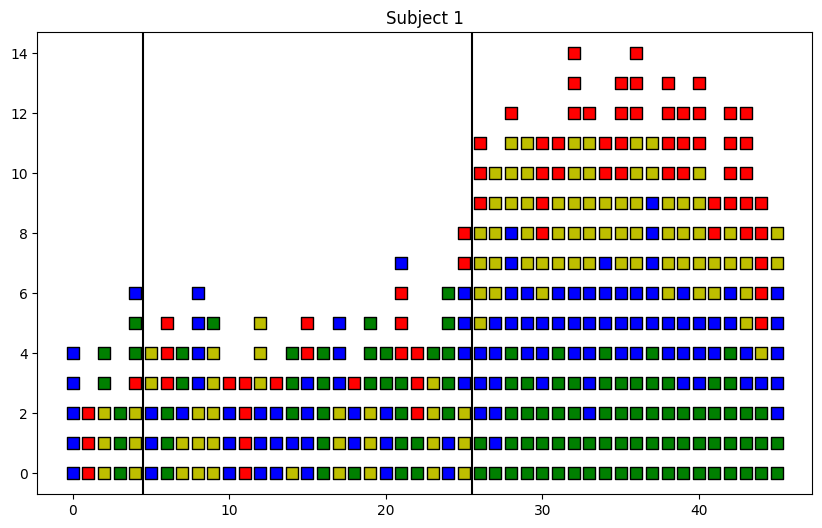

In [19]:
nicknames = {}
counter = 0

for idx in range(len(data)):
    log = data[idx]
    name = log["user"]["nickname"] #per estrarre il valore del nickname contenuto dentro user e assegnarlo alla variabile name
  
    if name not in nicknames:
        counter += 1
        nicknames[name] = counter

    participant_code = str(nicknames[name])

    _, hists = count_box_opened_over_trials(log["trials"])
    

    plt.figure(figsize=(10, 6)) # era 10,3...quindi ho ingrandito un po' la size della figura sulla y
    plt.title("Subject " + participant_code)
    for x,hist in enumerate(hists): #enumerate viene usato per ottenere sia l'indice x che il valore hist da ogni elemento di hists
        y = 0
        for room in hist:
            plt.scatter(x, y, color=colors[room], marker="s", s=70, edgecolors="k")
            #mettere qui la stellina * (se ricca metti stella, se povera non metti nulla)
            #guardare z order per spostare su y - order in layer
            #parametro alpha, va da 0 a 1 - 0 se trasparente
            y += 1
            
    for x in range(0, 2): #mi crea le linee per separare i blocchi
        plt.axvline(4.5 + x * 20, color="k", alpha=1)
        plt.axvline(25.5,color="k", alpha=1) # ho aggiunto questa linea per dividere il trial di prova che separa i due blocchi
            
        textYPos = -6 # ho messo -6 perchè voglio che la posizione della scritta nel grafico "Blocco 1" e "Blocco 2" sia più bassa di quella del "trialCode", che infatti è -2) nel grafico 
        
        if trialCode.startswith("trial_A") or trialCode.startswith("trial_B"):
            plt.text(4.5+x*20+8, textYPos, "Long Battery trials", color="k", fontweight="bold")
        if trialCode.startswith("trial_C") or trialCode.startswith("trial_D"):
            plt.text(4.5+x*20+8, textYPos, "Short Battery trials", color="k", fontweight="bold")

    
    for x, trial in enumerate(log["trials"]): # qui ciclo tra gli elementi della lista log["trials"].  NB: uso enumerate perchè mi dà sia l'indice (x) che il valore (trial) di ogni elemento nella lista.
        trialCode = trial["trialCode"] # per ciascun elemento trials nella lista io voglio il suo trialCode
        plt.text(x , -2.5, trialCode, ha='center', va='center', rotation='vertical') # per scrivere sotto ogni riga il nome del trial (trialCode)
        #commento la riga sopra: x é la posizione orizzontale della colonna corrente nel grafico, -2.5 è posizione sull'asse verticale della scritta
        
 
        
    plt.yticks([])
    plt.ylabel("# Boxes opened")
    plt.xlabel("Trials")
    plt.xticks([])
    plt.axis("equal") # per avere lo spazio figura-bordo uguale sia su x che su y
    plt.tight_layout()

    handles = [] # qui sto inizializzando una lista vuota
    for room, color in colors.items():
        patch = mpatches.Patch(color=color, label=room)
        handles.append(patch) #qui riempio la lista che ho creato 3 righe sopra
    plt.legend(handles=handles) #per creare la legenda

    
    plt.savefig("out/Subject" + name + "_hists.png", dpi=300)
    plt.clf()



In [ ]:
################################
nicknames = {}
counter = 0

for idx in range(len(data)):
    log = data[idx]
    name = log["user"]["nickname"] #per estrarre il valore del nickname contenuto dentro user e assegnarlo alla variabile name
  
    if name not in nicknames:
        counter += 1
        nicknames[name] = counter

    participant_code = str(nicknames[name])

    _, hists = count_box_opened_over_trials(log["trials"])
    

    plt.figure(figsize=(10, 6)) # era 10,3...quindi ho ingrandito un po' la size della figura sulla y
    plt.title("Subject " + participant_code)
    for x,hist in enumerate(hists): #enumerate viene usato per ottenere sia l'indice x che il valore hist da ogni elemento di hists
        y = 0
        for room in hist:
            if not trialCode.startswith("tutorial"): 
                plt.scatter(x, y, color=colors[room], marker="s", s=70, edgecolors="k")
            #mettere qui la stellina * (se ricca metti stella, se povera non metti nulla)
            #guardare z order per spostare su y - order in layer
            #parametro alpha, va da 0 a 1 - 0 se trasparente
                y += 1
            
    for x in range(0, 2): #mi crea le linee per separare i blocchi
            plt.axvline(4.5 + x * 20, color="k", alpha=1)
    #     plt.axvline(25.5,color="k", alpha=1) # ho aggiunto questa linea per dividere il trial di prova che separa i due blocchi
            
    #     textYPos = -6 # ho messo -6 perchè voglio che la posizione della scritta nel grafico "Blocco 1" e "Blocco 2" sia più bassa di quella del "trialCode", che infatti è -2) nel grafico 
        
    if trialCode.startswith("trial_A") or trialCode.startswith("trial_B"):
        plt.text(4.5+x*20+8, textYPos, "Long Battery trials", color="k", fontweight="bold")
    if trialCode.startswith("trial_C") or trialCode.startswith("trial_D"):
        plt.text(4.5+x*20+8, textYPos, "Short Battery trials", color="k", fontweight="bold")

    
    # for x, trial in enumerate(log["trials"]): # qui ciclo tra gli elementi della lista log["trials"].  NB: uso enumerate perchè mi dà sia l'indice (x) che il valore (trial) di ogni elemento nella lista.
    #     trialCode = trial["trialCode"] # per ciascun elemento trials nella lista io voglio il suo trialCode
    #     plt.text(x , -2.5, trialCode, ha='center', va='center', rotation='vertical') # per scrivere sotto ogni riga il nome del trial (trialCode)
    #     #commento la riga sopra: x é la posizione orizzontale della colonna corrente nel grafico, -2.5 è posizione sull'asse verticale della scritta
        
 
        
    plt.yticks([])
    plt.ylabel("# Boxes opened")
    plt.xlabel("Trials")
    plt.xticks([])
    plt.axis("equal") # per avere lo spazio figura-bordo uguale sia su x che su y
    plt.tight_layout()

    handles = [] # qui sto inizializzando una lista vuota
    for room, color in colors.items():
        patch = mpatches.Patch(color=color, label=room)
        handles.append(patch) #qui riempio la lista che ho creato 3 righe sopra
    plt.legend(handles=handles) #per creare la legenda

    
    plt.savefig("out/Subject" + name + "_prova.png", dpi=300)
    plt.clf()

/var/folders/0g/b__jgt415791qz3xxph3zprh0000gn/T/ipykernel_3082/1990583610.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6)) # era 10,3...quindi ho ingrandito un po' la size della figura sulla y


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [8]:
import pandas as pd #mi serve per salvarmi poi i results in un file excell

results = [] #inzializzo la lista risultati fuori dal ciclo

nicknames = {}
counter = 0

for idx in range(len(data)):
    log = data[idx]
    name = log["user"]["nickname"]  # Per estrarre il valore del nickname contenuto dentro user e assegnarlo alla variabile name
    if name not in nicknames:
        counter += 1
        nicknames[name] = counter

    assigned_number = nicknames[name]


    trials = log.get("trials", [])  # Se la chiave "trials" non è presente in log, viene assegnata una lista vuota [] come valore predefinito

    for trial in trials:
        trial_number = trial.get ("trialNumber")
        trial_code = trial.get("trialCode")
        
        # Aggiungi una condizione per scartare i trials che iniziano con "tutorial"
        if trial_code is not None and not trial_code.startswith("tutorial"): # se il trialCode inizia con "tutorial" non prenderlo! - così scarto già i tutorials dall'analisi
            events = trial.get("events", [])
            opened_box_count = 0  # creo una variabile che inizializzo a zero per contare quante viene aperta una box nel trial corrente
            firstareaopened_box_count = 0
            value_box_count = 0 # creo una variabile che inizializzo a zero per contare quante monete vengono raccolte in totale nel trial corrente 
            mean_box_count = 0 # creo una variabile che inizializzo a zero per calcolare poi la media del numero di monete raccolte per trial
            boxOpenedValues_list = [] # creo una lista - che creo qui dentro perchè voglio che si crei per ogni trial e che non sia "globale" per tutti i trials insieme - dove metto le info del valore contenuto in ciascuna box che il soggetto apre nel trial corrente 
            visitedareas_count = 0
            

            if trial_code.startswith("trial_A") or trial_code.startswith("trial_B"):
                trial_lungo = True
            else:
                trial_lungo = False

            for event in events:
                if event.get("trialEvent").startswith("Opened Box"):
                    outcome = event["outcome"][0]  # Accedi al primo elemento di "outcome"
                    
                    value_box_count += outcome["y"]
                
                    opened_box_count += 1  #Incremento il conteggio se l'evento inizia con "Opened Box" così mi conta quante box ha preso il partecipante in quel trial

                    boxOpenedValues_list.append(
                        int (outcome["y"]) #mettimelo a intero
                    )


            first_taken = False #inizializzo queste variabile booleana come false
            second_taken = False
            third_taken = False
            fourth_taken = False
            fifth_taken = False

            FirstRoomEnteredandExit = False
            enteredSecondArea = False

            # firstRoomEntered = ""

            # secondRoomEntered = ""

            
            for event in events:

                if event.get("trialEvent"). startswith('Entered Room ') and event.get("room") == "Center":
                    entered_time = event['timeInSeconds']


                if event.get("trialEvent").startswith("Opened Box"):     
                        firstareaopened_box_count += 1

                        if first_taken == False: #al primo giro dentro il ciclo è sempre falsa perchè l'ho inizializzata così qualche riga sopra
                            
                            firstRoomEntered = event ["room"]
                            firstbox_time =  event ["timeInSeconds"]
                            firstbox_timetotake = firstbox_time - entered_time
                            first_taken = True # se la riga sopra è vera, metti first_taken come true. Questo mi permette di fermarmi dopo che il soggetto ha preso il primo goal perchè metto la variabile a true e quindi la condizione first_taken == False non sarà più vera le volte successive
                    
                            if int (event["outcome"][0]["y"]) == 8: # Accedi al primo elemento di "outcome" e trasformalo in intero (scrivo questa cosa dell'intero perchè so che mi legge 8 come 8.0 da prove precedenti)
                                first_area_rich = True
                            else:
                                first_area_rich = False

                        if first_taken == True and firstareaopened_box_count ==2: 
                            secondbox_time = event ["timeInSeconds"]
                            secondbox_timetotake = secondbox_time - firstbox_time
                            second_taken = True
                        elif firstareaopened_box_count <=1:
                            secondbox_timetotake =  np.nan

                        if second_taken == True and firstareaopened_box_count == 3: 
                            thirdbox_time = event ["timeInSeconds"]
                            thirdbox_timetotake = thirdbox_time - secondbox_time
                            third_taken = True
                        elif firstareaopened_box_count <=2:
                            thirdbox_timetotake =  np.nan
                                

                        if third_taken == True and firstareaopened_box_count == 4: 
                            fourthbox_time = event ["timeInSeconds"]
                            fourthbox_timetotake = fourthbox_time - thirdbox_time
                            fourth_taken = True
                        elif firstareaopened_box_count <=3:
                            fourthbox_timetotake =  np.nan
                                

                        if fourth_taken == True and firstareaopened_box_count == 5: 
                            fifthbox_time = event ["timeInSeconds"]
                            fifthbox_timetotake = fifthbox_time - fourthbox_time
                            fifth_taken = True
                        elif firstareaopened_box_count <= 4:
                            fifthbox_timetotake = np.nan

                

                if event.get("trialEvent") == "Entered Room Center" or event.get("trialEvent") == "Trial Completed":
                    exit_time = event ["timeInSeconds"]
                    FirstRoomEnteredandExit = True
                    break  # break "uccide" i cicli (if non è un ciclo!)


              

                
            totalfirstareatime = exit_time - entered_time

            
            

            if firstareaopened_box_count == 1:
                lasttomargin_time = exit_time - firstbox_time
            elif firstareaopened_box_count == 2:
                lasttomargin_time = exit_time - secondbox_time
            elif firstareaopened_box_count == 3:
                lasttomargin_time = exit_time - thirdbox_time
            elif firstareaopened_box_count == 4:
                lasttomargin_time = exit_time - fourthbox_time
            elif firstareaopened_box_count == 5:
                lasttomargin_time = exit_time - fifthbox_time
            

            for event in events:
                    
                    if FirstRoomEnteredandExit == True and event.get("trialEvent").startswith('Entered Room') and event.get("room") == "Center" and event ["timeInSeconds"] > exit_time:
                        enteredsecondarea_time = event ["timeInSeconds"]
                        enteredSecondArea = True
                    
                    if event.get("trialEvent").startswith("Opened Box #0") and enteredSecondArea == True : 
                        firstboxsecondarea_time = event ["timeInSeconds"]
                        break
            
            margintofirstsecondarea_time = firstboxsecondarea_time - enteredsecondarea_time
                    
            exitandtakefirstboxsecondarea_timetotake = lasttomargin_time + margintofirstsecondarea_time

           
            #####
            if first_area_rich == True:
                value_lastbox_firstarea = 8 - (firstareaopened_box_count - 1)
            else:
                value_lastbox_firstarea = 5 - (firstareaopened_box_count - 1)


            # nella riga sotto metto una toppa al fatto che a volte il firstareaopened_box_count è = 0
            # questo succede quando il sogg. entra nella prima stanza ma non prende nessuna cassa
            # quando succede così mi faccio mettere NaN nella colonna corrispondente ma dovrei fare un controllo
            # il controllo dovrebbe incrementare il valore di firstareaopened_box_count quando il sogg., dopo essere entrato nella prima stanza ma non aver preso nessuna cassa, rientra nella stessa area e prende casse

            if firstareaopened_box_count == 0:
                value_lastbox_firstarea = float('NaN')


  

            sensor_outcome = "Non ha visto il sensore"
            sensor_opened_order = [] #se questo numero nell'excell è  = 1 allora ha visto il sensore e poi è entrato nelle aree, se è maggiore o non ha visto il sensore o lo ha visto dopo esser entrato in una o più aree
            
            # In alternativa a come sta fatto, si potrebbe anche fare così
            # for i in range(len(events)):
            #     event = events[i]
            for i, event in enumerate(events): #i mi dice l'indice di event e enumerate mi fa ciclare sia su i che sugli events
                if event.get("trialEvent") == "Used Sensor A":
                    outcome = event["outcome"][0]  # Accedi al primo elemento di "outcome"
                    sensor_outcome = outcome
                    
                    if outcome[2] == 0.8 : #questo "2" è l'indice di una lista, quindi qui dico che se il 3 valore è uguale a 0.8 allora...
                        trial_ricco = True
                    else:
                        trial_ricco = False
                    sensor_opened_order.append(i)
    
                   
            mean_box_value = value_box_count / opened_box_count #media

            #print(f"{name} - Trial {trial_code} - {sensor_outcome} - Opened Box count: {opened_box_count} - Value Box count: {value_box_count} - Mean Box value: {mean_box_value} - {boxOpenedValues_list}")



            #ora voglio vedere in quante stanze per trial entra il soggetto

            for event in events:
                if event.get("trialEvent") == "Entered Room Center" or event.get("trialEvent") == "Trial Completed" :
                #if event.get("trialEvent").startswith("Entered Room") and event.get("room") == "Center":
                #if event.get("trialEvent").startswith("Entered Room") and event.get("trialEvent") != "Entered Room Center":
                   visitedareas_count += 1
                


            
            # Qui vado ad aggiungere i dati del trial corrente alla lista results inizializzata all'inizio
            results.append({
                #ogni riga dell'excell che mi andrò a creare avrà queste informzioni dove sulle colonne avrò i titoli contenuti qui sotto nelle ""
                "Subject": name,
                "SubjectCode": assigned_number,
                "TrialNumber": trial_number,
                "Trial": trial_code,
                "LongBattery": trial_lungo,
                "RichEnvironment": trial_ricco,
                "SensorOutcome": sensor_outcome,
                "SensorEventIndex": sensor_opened_order,
                "BoxOpenedPerTrial": opened_box_count,
                "CoinsGainedPerTrial": value_box_count,
                "CoinGainedPerBoxPerTrialMean": mean_box_value,
                "BoxOpenedValues": boxOpenedValues_list, #in questo modo mi mette nella colonna excell tutti i valori contenuti dentro outcome > 0 ma, visto che mi serve solo il valore contenuto in y, rimuovo gli altri direttamente su excell
                "BoxOpenedFirstArea": firstareaopened_box_count,
                "ValueLastBoxOpenedFirstArea": value_lastbox_firstarea,
                "FirstAreaRich": first_area_rich,
                "FirstRoomEntered": firstRoomEntered,
                "TimeInTheFirstRoom": totalfirstareatime,
                "VisitedAreas": visitedareas_count,
                "FirstBoxTimeToTake": firstbox_timetotake, #tempo per prendere la prima cassa, i.e. tempo che ci mette a prendere la prima cassa da quando entra nella prima area
                "SecondBoxTimeToTake": secondbox_timetotake, #tempo impiegato tra prima e seconda cassa nella prima area, i.e tempo che ci mette a prendere la seconda cassa dopo che ha preso la prima
                "ThirdBoxTimeToTake": thirdbox_timetotake, 
                "FourthBoxTimeToTake": fourthbox_timetotake,
                "FifthBoxTimeToTake": fifthbox_timetotake,
                "LastToMarginTime": lasttomargin_time,
                "TimeToExitFirstAreaAndTakeABoxInTheSecond": exitandtakefirstboxsecondarea_timetotake, #tempo tra l'ultima cassa presa nella prima area e l'uscita dalla prima area + tempo tra l'entrata nella seconda area e il tempo necessario per prendere poi la prima cassa nella seconda area
            })  



# Creo un df (dataframe) dove metto i results - uso pandas as pd qui!!
df = pd.DataFrame(results)

# Esporto il df in un file Excel
excel_file = "out/results.xlsx"
df.to_excel(excel_file, index=False)

# Esporto il df in un file CSV (.csv)
csv_file = "out/results.csv"
df.to_csv(csv_file, index=False)

print(f"Dati esportati in {excel_file} e {csv_file}")



Dati esportati in out/results.xlsx e out/results.csv


In [22]:
print(names)

['Mallog', 'Sofia', 'Daniele', 'Mic', 'Pietro', 'Kiara', 'Jack', 'Gaia', 'Federica', 'Gaiag', 'Ric', 'Eleos', 'Simo', 'Amox', 'Tereza', 'Chiara', 'Martina', 'Lullu', 'Marti', 'Ludo', 'Giorgia', 'Raul', 'Mattia', 'Christian', 'Lorenzo', 'Anna', 'Claudia', 'Elena', 'Ele', 'Riccardo', 'Mid', 'Romaraff', 'Ludovica']


In [ ]:
# a seguire codice per calcolare il tempo medio di durata dell'esperimento

experimentLenght_results = [] #inzializzo la lista risultati fuori dal ciclo

for idx in range(len(data)):
    log = data[idx]
    #age = log["user"]["age"]
    date = log["date"]
    

    startingTime = date.split(" ", 1) [-1] #splitta per spazio e mi tiene quello dopo lo spazio
    trials = log.get("trials", [])  # Se la chiave "trials" non è presente in log, viene assegnata una lista vuota [] come valore predefinito
    
    for trial in trials:
       trial_number = trial.get ("trialNumber")
       if trial_number == 46:
         finishTime = trial.get ("endTime")
           
    #experimentTimeLenght = startingTime - endingTime

    # Convert strings to timedeltas
    startingTime_timedelta = pd.to_timedelta(startingTime)
    finishTime_timedelta = pd.to_timedelta(finishTime)

    # Calculate the difference in minutes
    experimentTimeLenght = (finishTime_timedelta - startingTime_timedelta).total_seconds() / 60


    experimentLenght_results.append(
            {
                #"Age": age,
                "StartingTime": startingTime,
                "FinishTime": finishTime,
                "ExperimentTimeLenght": experimentTimeLenght,           
            })


experimentLenght_df = pd.DataFrame(experimentLenght_results)

# Esporto il df in un file Excel
excel_file = "out/experimentLenght.xlsx"
experimentLenght_df.to_excel(excel_file, index=False)





# per levarmi di torno la data e tenermi solo l'informazione dell'orario posso fare o con lstrip o con split. Ma nel mio caso devo usare split perchè la data cambia se i partecipanti fanno l'esperimento in giorni diversi
#print(date.lstrip("23-10-24")) #se quello che sta tra "" sta a left, levalo
#print(date.split(" ", 1) [-1]) # splitta per spazio e mi tiene quello dopo lo spazio




In [ ]:
# a seguire provo ad integrare il codice con il check se i soggetti rientrano nella prima area

import pandas as pd #mi serve per salvarmi poi i results in un file excell

results = [] #inzializzo la lista risultati fuori dal ciclo

nicknames = {}
counter = 0

for idx in range(len(data)):
    log = data[idx]
    name = log["user"]["nickname"]  # Per estrarre il valore del nickname contenuto dentro user e assegnarlo alla variabile name
    if name not in nicknames:
        counter += 1
        nicknames[name] = counter

    assigned_number = nicknames[name]


    trials = log.get("trials", [])  # Se la chiave "trials" non è presente in log, viene assegnata una lista vuota [] come valore predefinito

    for trial in trials:
        trial_number = trial.get ("trialNumber")
        trial_code = trial.get("trialCode")
        
        # Aggiungi una condizione per scartare i trials che iniziano con "tutorial"
        if trial_code is not None and not trial_code.startswith("tutorial"): # se il trialCode inizia con "tutorial" non prenderlo! - così scarto già i tutorials dall'analisi
            events = trial.get("events", [])
            opened_box_count = 0  # creo una variabile che inizializzo a zero per contare quante viene aperta una box nel trial corrente
            firstareaopened_box_count = 0
            value_box_count = 0 # creo una variabile che inizializzo a zero per contare quante monete vengono raccolte in totale nel trial corrente 
            mean_box_count = 0 # creo una variabile che inizializzo a zero per calcolare poi la media del numero di monete raccolte per trial
            boxOpenedValues_list = [] # creo una lista - che creo qui dentro perchè voglio che si crei per ogni trial e che non sia "globale" per tutti i trials insieme - dove metto le info del valore contenuto in ciascuna box che il soggetto apre nel trial corrente 
            visitedareas_count = 0
            
            reenteredfirstareaopened_box_count = 0

            if trial_code.startswith("trial_A") or trial_code.startswith("trial_B"):
                trial_lungo = True
            else:
                trial_lungo = False

            for event in events:
                if event.get("trialEvent").startswith("Opened Box"):
                    outcome = event["outcome"][0]  # Accedi al primo elemento di "outcome"
                    
                    value_box_count += outcome["y"]
                
                    opened_box_count += 1  #Incremento il conteggio se l'evento inizia con "Opened Box" così mi conta quante box ha preso il partecipante in quel trial

                    boxOpenedValues_list.append(
                        int (outcome["y"]) #mettimelo a intero
                    )


            first_taken = False #inizializzo queste variabile booleana come false
            second_taken = False
            third_taken = False
            fourth_taken = False
            fifth_taken = False

            FirstRoomEnteredandExit = False
            enteredSecondArea = False

            firstRoomEntered = ""

            # secondRoomEntered = ""

            reenteredthesamefirstarea = False

            
            for event in events:

                if event.get("trialEvent"). startswith('Entered Room ') and event.get("room") == "Center":
                    entered_time = event['timeInSeconds']


                if event.get("trialEvent").startswith("Opened Box"):     
                        firstareaopened_box_count += 1

                        if first_taken == False: #al primo giro dentro il ciclo è sempre falsa perchè l'ho inizializzata così qualche riga sopra
                            
                            firstRoomEntered = event ["room"]
                            firstbox_time =  event ["timeInSeconds"]
                            firstbox_timetotake = firstbox_time - entered_time
                            first_taken = True # se la riga sopra è vera, metti first_taken come true. Questo mi permette di fermarmi dopo che il soggetto ha preso il primo goal perchè metto la variabile a true e quindi la condizione first_taken == False non sarà più vera le volte successive
                    
                            if int (event["outcome"][0]["y"]) == 8: # Accedi al primo elemento di "outcome" e trasformalo in intero (scrivo questa cosa dell'intero perchè so che mi legge 8 come 8.0 da prove precedenti)
                                first_area_rich = True
                            else:
                                first_area_rich = False

                        if first_taken == True and firstareaopened_box_count ==2: 
                            secondbox_time = event ["timeInSeconds"]
                            secondbox_timetotake = secondbox_time - firstbox_time
                            second_taken = True
                        elif firstareaopened_box_count <=1:
                            secondbox_timetotake =  np.nan

                        if second_taken == True and firstareaopened_box_count == 3: 
                            thirdbox_time = event ["timeInSeconds"]
                            thirdbox_timetotake = thirdbox_time - secondbox_time
                            third_taken = True
                        elif firstareaopened_box_count <=2:
                            thirdbox_timetotake =  np.nan
                                

                        if third_taken == True and firstareaopened_box_count == 4: 
                            fourthbox_time = event ["timeInSeconds"]
                            fourthbox_timetotake = fourthbox_time - thirdbox_time
                            fourth_taken = True
                        elif firstareaopened_box_count <=3:
                            fourthbox_timetotake =  np.nan
                                

                        if fourth_taken == True and firstareaopened_box_count == 5: 
                            fifthbox_time = event ["timeInSeconds"]
                            fifthbox_timetotake = fifthbox_time - fourthbox_time
                            fifth_taken = True
                        elif firstareaopened_box_count <= 4:
                            fifthbox_timetotake = np.nan

                

                if event.get("trialEvent") == "Entered Room Center" or event.get("trialEvent") == "Trial Completed":
                    exit_time = event ["timeInSeconds"]
                    FirstRoomEnteredandExit = True
                    if FirstRoomEnteredandExit == True and event.get("trialEvent") == "Entered Room Center" and event.get("trialEvent").endswith(firstRoomEntered):
                        reenteredthesamefirstarea = True
                        break
                
                totalfirstareatime = exit_time - entered_time
        

            if firstareaopened_box_count == 1:
                lasttomargin_time = exit_time - firstbox_time
            elif firstareaopened_box_count == 2:
                lasttomargin_time = exit_time - secondbox_time
            elif firstareaopened_box_count == 3:
                lasttomargin_time = exit_time - thirdbox_time
            elif firstareaopened_box_count == 4:
                lasttomargin_time = exit_time - fourthbox_time
            elif firstareaopened_box_count == 5:
                lasttomargin_time = exit_time - fifthbox_time

                    
                        

            for event in events:
                    
                    if FirstRoomEnteredandExit == True and event.get("trialEvent").startswith('Entered Room') and event.get("room") == "Center" and event ["timeInSeconds"] > exit_time:
                        enteredsecondarea_time = event ["timeInSeconds"]
                        enteredSecondArea = True
                    
                    if event.get("trialEvent").startswith("Opened Box #0") and enteredSecondArea == True : 
                        firstboxsecondarea_time = event ["timeInSeconds"]
                        break
            
            margintofirstsecondarea_time = firstboxsecondarea_time - enteredsecondarea_time
                    
            exitandtakefirstboxsecondarea_timetotake = lasttomargin_time + margintofirstsecondarea_time

           
            #####
            if first_area_rich == True:
                value_lastbox_firstarea = 8 - (firstareaopened_box_count - 1)
            else:
                value_lastbox_firstarea = 5 - (firstareaopened_box_count - 1)


            # nella riga sotto metto una toppa al fatto che a volte il firstareaopened_box_count è = 0
            # questo succede quando il sogg. entra nella prima stanza ma non prende nessuna cassa
            # quando succede così mi faccio mettere NaN nella colonna corrispondente ma dovrei fare un controllo
            # il controllo dovrebbe incrementare il valore di firstareaopened_box_count quando il sogg., dopo essere entrato nella prima stanza ma non aver preso nessuna cassa, rientra nella stessa area e prende casse

            if firstareaopened_box_count == 0:
                value_lastbox_firstarea = float('NaN')


  

            sensor_outcome = "Non ha visto il sensore"
            sensor_opened_order = [] #se questo numero nell'excell è  = 1 allora ha visto il sensore e poi è entrato nelle aree, se è maggiore o non ha visto il sensore o lo ha visto dopo esser entrato in una o più aree
            
            # In alternativa a come sta fatto, si potrebbe anche fare così
            # for i in range(len(events)):
            #     event = events[i]
            for i, event in enumerate(events): #i mi dice l'indice di event e enumerate mi fa ciclare sia su i che sugli events
                if event.get("trialEvent") == "Used Sensor A":
                    outcome = event["outcome"][0]  # Accedi al primo elemento di "outcome"
                    sensor_outcome = outcome
                    
                    if outcome[2] == 0.8 : #questo "2" è l'indice di una lista, quindi qui dico che se il 3 valore è uguale a 0.8 allora...
                        trial_ricco = True
                    else:
                        trial_ricco = False
                    sensor_opened_order.append(i)  
                   
            mean_box_value = value_box_count / opened_box_count #media

            #print(f"{name} - Trial {trial_code} - {sensor_outcome} - Opened Box count: {opened_box_count} - Value Box count: {value_box_count} - Mean Box value: {mean_box_value} - {boxOpenedValues_list}")



            #ora voglio vedere in quante stanze per trial entra il soggetto

            for event in events:
                if event.get("trialEvent") == "Entered Room Center" or event.get("trialEvent") == "Trial Completed" :
                #if event.get("trialEvent").startswith("Entered Room") and event.get("room") == "Center":
                #if event.get("trialEvent").startswith("Entered Room") and event.get("trialEvent") != "Entered Room Center":
                   visitedareas_count += 1
                


            
            # Qui vado ad aggiungere i dati del trial corrente alla lista results inizializzata all'inizio
            results.append({
                #ogni riga dell'excell che mi andrò a creare avrà queste informzioni dove sulle colonne avrò i titoli contenuti qui sotto nelle ""
                "Subject": name,
                "SubjectCode": assigned_number,
                "TrialNumber": trial_number,
                "Trial": trial_code,
                "LongBattery": trial_lungo,
                "RichEnvironment": trial_ricco,
                "SensorOutcome": sensor_outcome,
                "SensorEventIndex": sensor_opened_order,
                "BoxOpenedPerTrial": opened_box_count,
                "CoinsGainedPerTrial": value_box_count,
                "CoinGainedPerBoxPerTrialMean": mean_box_value,
                "BoxOpenedValues": boxOpenedValues_list, #in questo modo mi mette nella colonna excell tutti i valori contenuti dentro outcome > 0 ma, visto che mi serve solo il valore contenuto in y, rimuovo gli altri direttamente su excell
                "BoxOpenedFirstArea": firstareaopened_box_count,
                "ValueLastBoxOpenedFirstArea": value_lastbox_firstarea,
                "FirstAreaRich": first_area_rich,
                "FirstRoomEntered": firstRoomEntered,
                "TimeInTheFirstRoom": totalfirstareatime,
                "VisitedAreas": visitedareas_count,
                "FirstBoxTimeToTake": firstbox_timetotake, #tempo per prendere la prima cassa, i.e. tempo che ci mette a prendere la prima cassa da quando entra nella prima area
                "SecondBoxTimeToTake": secondbox_timetotake, #tempo impiegato tra prima e seconda cassa nella prima area, i.e tempo che ci mette a prendere la seconda cassa dopo che ha preso la prima
                "ThirdBoxTimeToTake": thirdbox_timetotake, 
                "FourthBoxTimeToTake": fourthbox_timetotake,
                "FifthBoxTimeToTake": fifthbox_timetotake,
                "LastToMarginTime": lasttomargin_time,
                "TimeToExitFirstAreaAndTakeABoxInTheSecond": exitandtakefirstboxsecondarea_timetotake, #tempo tra l'ultima cassa presa nella prima area e l'uscita dalla prima area + tempo tra l'entrata nella seconda area e il tempo necessario per prendere poi la prima cassa nella seconda area
                "Reenteredthefirstarea": reenteredthesamefirstarea,
            })  



# Creo un df (dataframe) dove metto i results - uso pandas as pd qui!!
df = pd.DataFrame(results)

# Esporto il df in un file Excel
excel_file = "out/PROVA.xlsx"
df.to_excel(excel_file, index=False)

# Esporto il df in un file CSV (.csv)
csv_file = "out/PROVA.csv"
df.to_csv(csv_file, index=False)

print(f"Dati esportati in {excel_file} e {csv_file}")


Dati esportati in out/PROVA.xlsx e out/PROVA.csv
